# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.114333e+01     6.938739e+00
 * time: 0.004322052001953125
     1     3.023044e+01     5.528393e+00
 * time: 0.012696027755737305
     2     1.775489e+01     4.585491e+00
 * time: 0.03538012504577637
     3     1.368839e+01     1.907458e+00
 * time: 0.054147958755493164
     4     1.229210e+01     2.169293e+00
 * time: 0.07310295104980469
     5     1.172542e+01     1.764597e+00
 * time: 0.08879709243774414
     6     1.075359e+01     1.271500e+00
 * time: 0.10460305213928223
     7     1.031478e+01     1.203198e+00
 * time: 0.1202700138092041
     8     9.993307e+00     9.275531e-01
 * time: 0.13598895072937012
     9     9.768305e+00     6.763832e-01
 * time: 0.1518421173095703
    10     9.605371e+00     4.611830e-01
 * time: 0.1676020622253418
    11     9.503622e+00     3.680377e-01
 * time: 0.1840071678161621
    12     9.438655e+00     4.381488e-01
 * time: 0.19670796394348145
    13     9.353827e+00     7.585500e-01
 * time: 

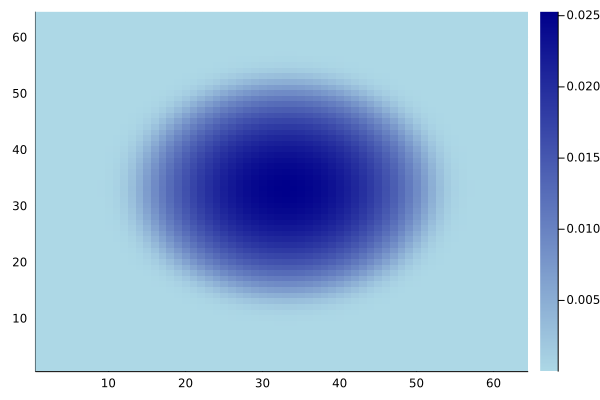

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)